#### Machine Learning

# KMeans - Agrupamento de Dados

### AGRUPAMENTO DE DADOS
#### É uma técnica de Machine Learning que consiste em segmentar ítens que possuem algum tipo de similaridade (propriedades e características em comum).

### Tipos de Agrupamento
#### 1. EXCLUSIVE CLUSTER OU AGRUPAMENTO EXCLUSIVO - Refere-se a um tipo de agrupamento em que os registros são EXCLUSIVOS, ou seja, cada registro pertence a um único grupo.
#### 2. OVERLAPPING CLUSTER OU AGRUPAMENTO SOBREPOSTO - Refere-se aos agrupamentos em que os registros PODEM PERTENCER A MAIS DE UM GRUPO.
#### 3. HIERARCHIAL CLUSTER OU AGRUPAMENTO HIERÁRQUICO - Refere-se aos agrupamentos que possui uma hierarquia entre os grupos. Ex.: Grupos e Subgrupos.

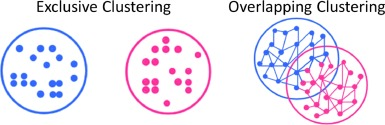

In [1]:
from IPython.display import Image
Image(filename ="exclusive_overlapping.png", width=500, height=500)

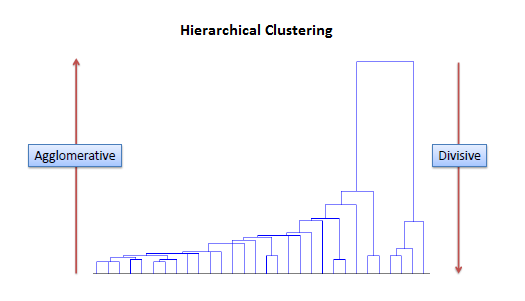

In [2]:
Image(filename="hierarchical.png", width=500, height=500)

### ALGORITMO KMeans
#### É um algoritmo não supervisionado em que é passado um parâmetro K que define o número de clusters.
#### A similaridade entre cada ponto é calculada por meio de uma função de distância.

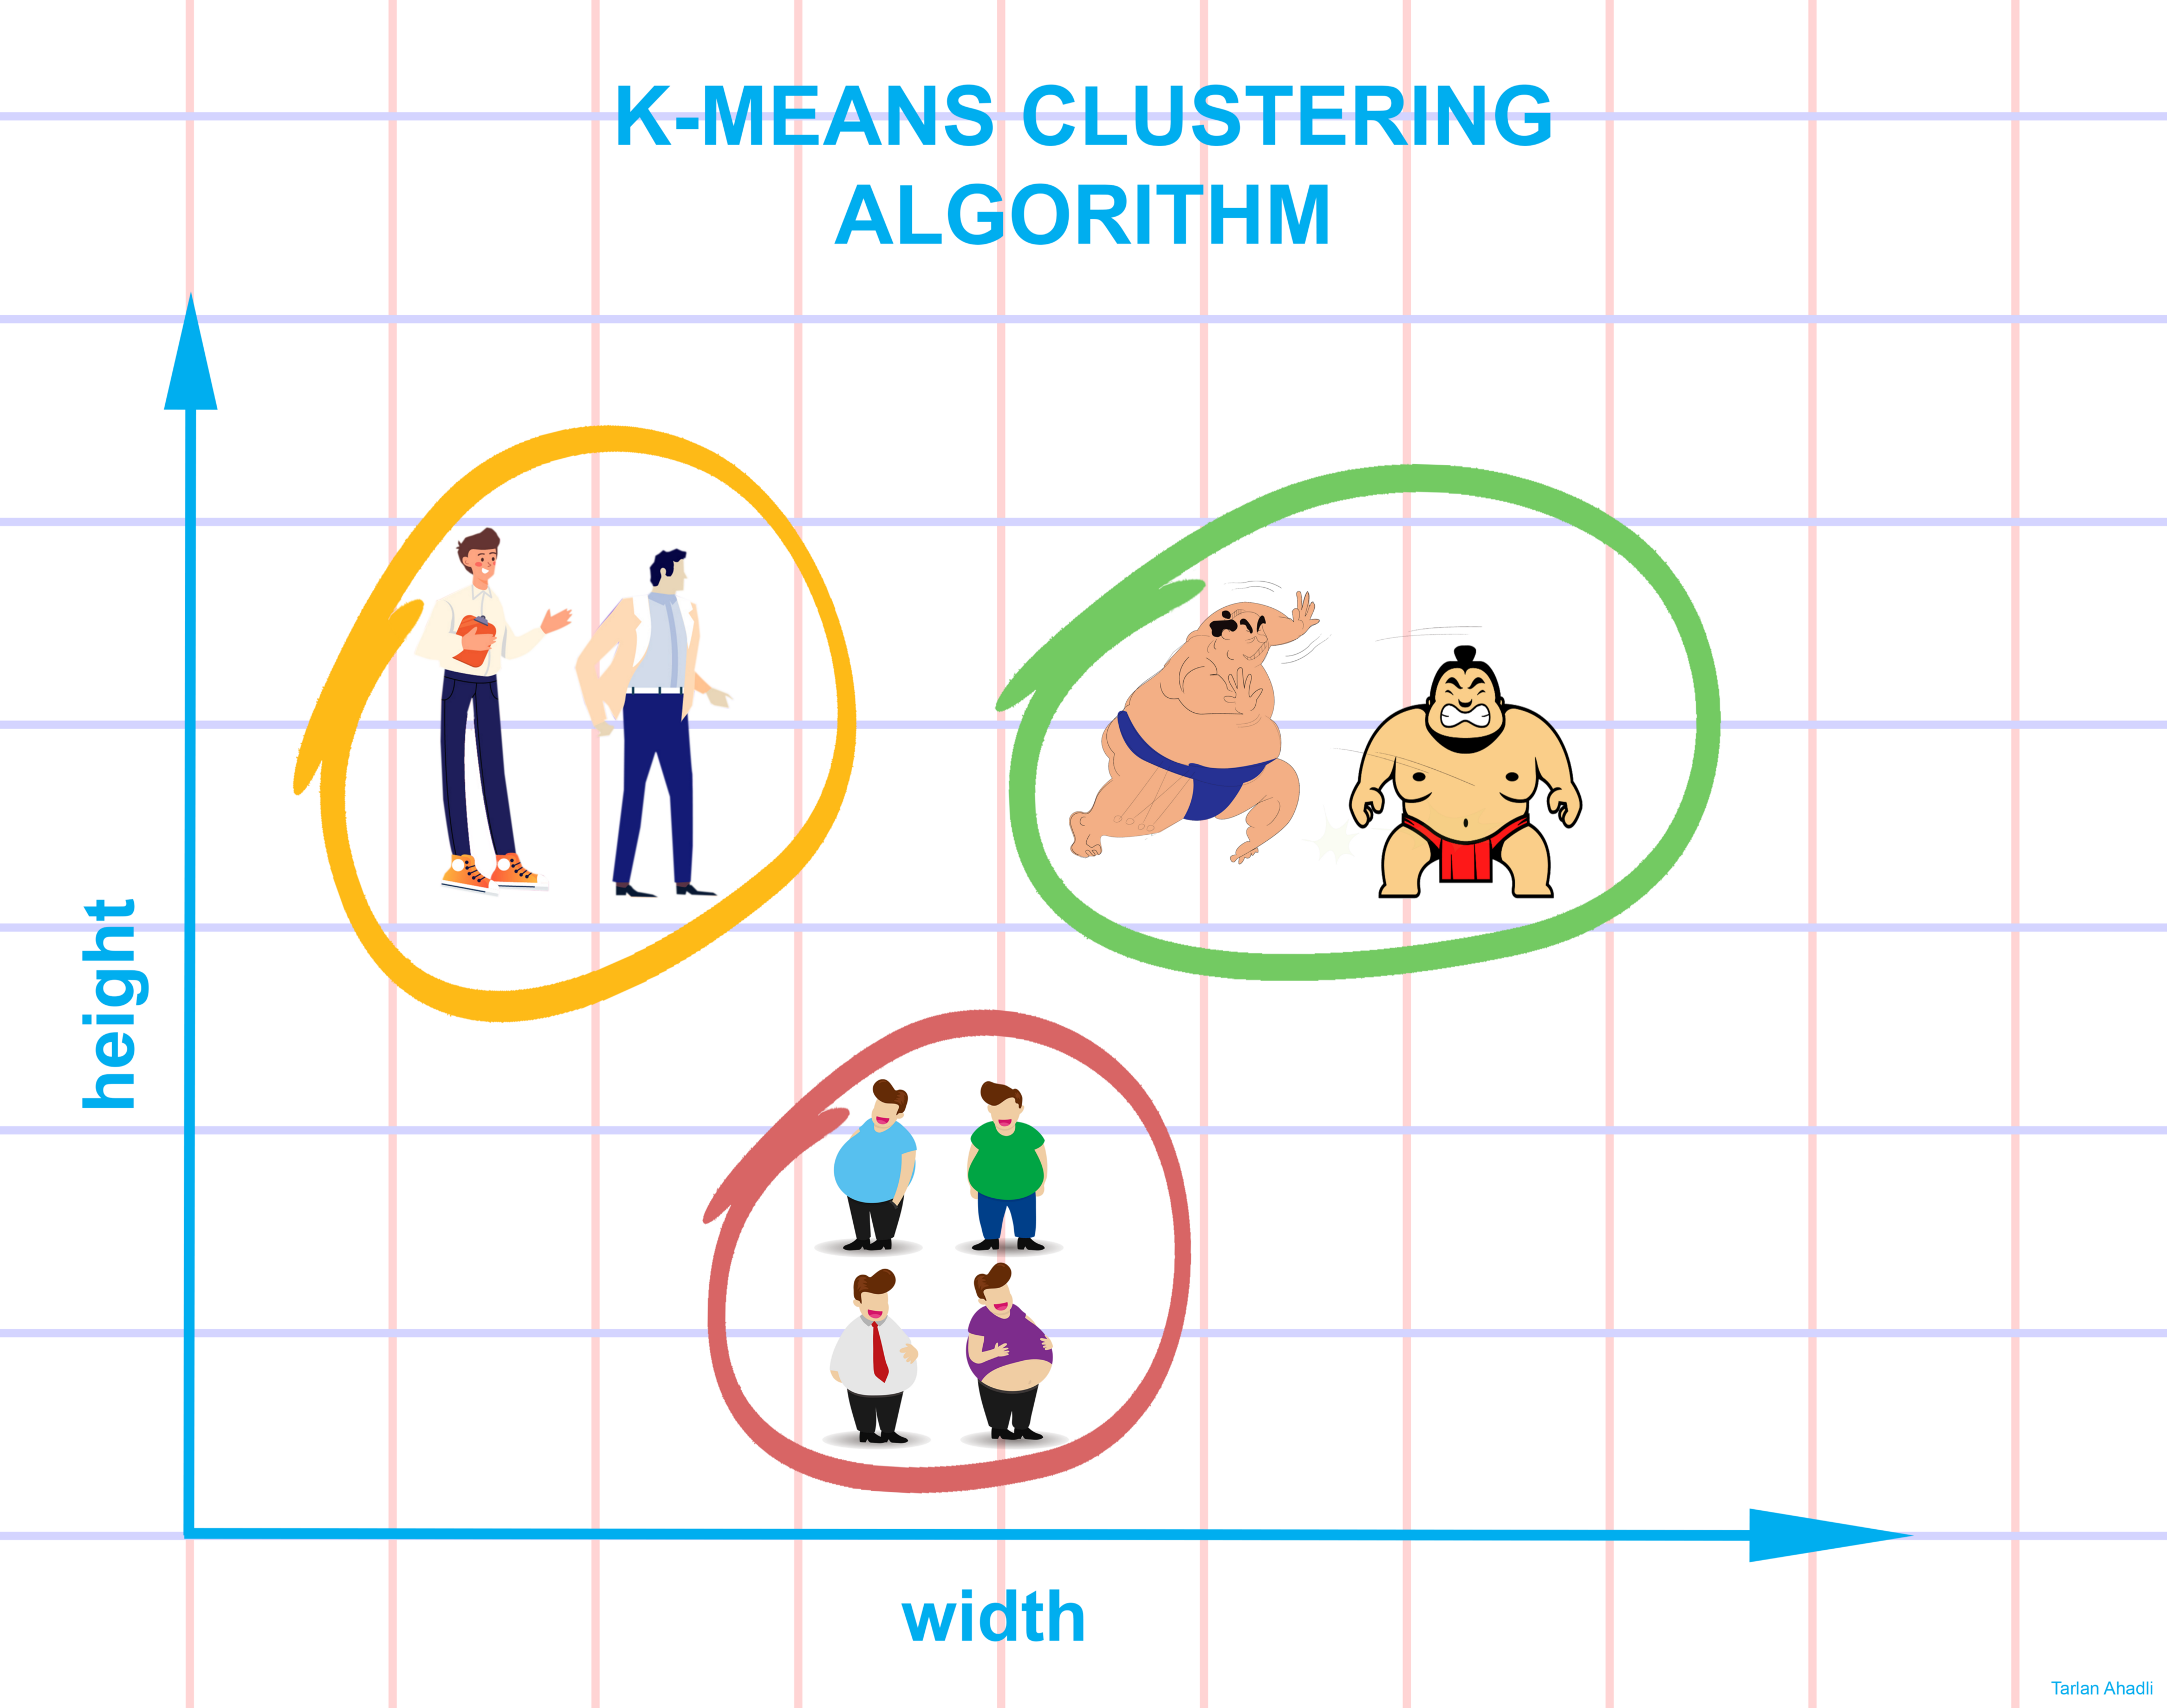

In [3]:
Image(filename = "kmeans.png", width=500, height=500)

### Funcionamento KMeans
#### O funcionamento do KMeans foi dividido em quatro fases:
#### 1. INICIALIZAÇÃO: Nesta fase ocorre a criação de forma aleatória (ou por meio de outro método) de K centróides, onde o número de centróides é representado pelo parâmetro K.
#### CENTRÓIDES - são pontos de dados centrais dos clusters. São referências que serão utilizadas para calcular a distância entre os dados e gerar os clusters.
#### 2. ATRIBUIÇÃO AO CLUSTER: É calculada a distância entre todos os pontos de dados e cada um dos centróides. Os registros são agrupados considerando os clusters que tem a menor distância dos centróides. Para o cálculo da distância são utilizadas funções como a Euclidiana.
#### 3. MOVIMENTAÇÃO DE CENTRÓIDES: Recalcula o valor dos centróides por meio da média dos valores dos pontos de dados.
#### 4. OTIMIZAÇÃO DO Kmeans: São repetidas as fases: atribuição ao cluster e movimentação dos centróides até o cluster tornar-se estático ou algum critério de parada for atingido. Um exemplo de critério de parada é o número de iterações fornecido quando está sendo processada uma base de dados muito volumosa.

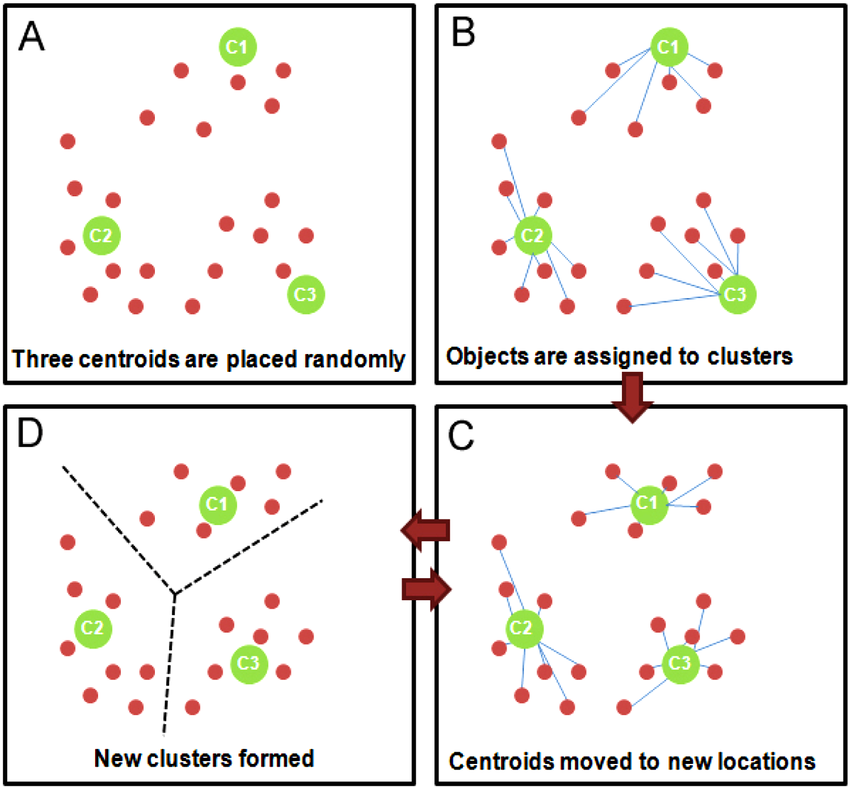

In [4]:
Image(filename = "Kmeans_funcionamento.png", width=500, height=500)

### 1. Instalando e Importando Bibliotecas

In [5]:
# Biblioteca pandas --> Análise de dados - Já está inclusa no Jupyter Notebook.
# Bibliotecas matplotlib e seaborn --> Plotagem de Gráficos - É necessário fazer a instalação.
# Biblioteca sklearn --> Machine Learning

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn==0.9.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
from sklearn.cluster import KMeans

### Carregando a base de dados Iris
#### Esta base de dados traz as seguintes informações sobre a flor íris: 
#### - Comprimento da Sépala (SepalLength), 
#### - Largura da Sépala (SepalWidth),
#### - Comprimento da Pétala (PetalLength), 
#### - Largura da Pétala (PetalWidth), e 
#### - Classificação de acordo com a espécie (Species). 
#### A classificação da espécie pode ser: Setosa (50 dados), Versicolor (50 dados) e Virgínica (50 dados). 

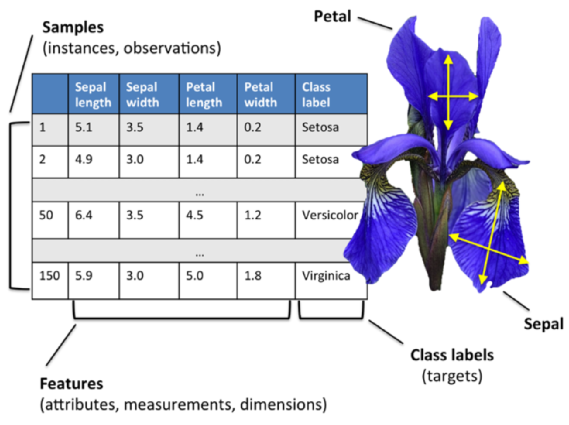

In [13]:
Image(filename ="iris-data-set.png", width=500, height=500)

In [14]:
# Utilizando o método read_csv para importar o arquivo "iris.csv"

In [15]:
iris = pd.read_csv("iris.csv")

In [16]:
# A variável criada é do tipo DataFrame do Pandas

In [17]:
type(iris)

pandas.core.frame.DataFrame

In [18]:
# Visualizando as primeiras 5 linhas do dataframe com o método head()

In [19]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Separando os valores de dados e classes por meio do método drop('coluna_classificacao') e armazenando na variável x_iris.
# Exibindo os 10 primeiros valores de x_iris

In [21]:
x_iris = iris.drop('Species',axis=1)
x_iris[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [22]:
# x_iris é um tipo de variável DataFrame do Pandas.

In [23]:
type(x_iris)

pandas.core.frame.DataFrame

In [24]:
# Armazenando os valores da coluna classificatória Species dentro da variável y_iris (variável do tipo Séries do Panda).
# Exibindo os 10 primeiros valores de y_iris.
# Armazenando apenas para plotagem de gráficos, e não por causa do algorítmo K-means, pois trata-se de um algoritmo não 
# supervisionado).

In [25]:
y_iris = iris.Species
y_iris[:10]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

In [26]:
# Retornando os valores únicos com o método unique(). O método unique() funciona com as variáveis dos seguintes tipos:
# Se a entrada for um índice (index) , o retorno será um índice (index).
# Se a entrada for um tipo categórico (Categorical dtype), o retorno será categórico (Categorical dtype).
# Se a entrada for uma Série (Series/ndarray), o retorno será um ndarray.

In [27]:
type(y_iris)

pandas.core.series.Series

In [28]:
# Como o tipo da variável y_iris é Séries do Pandas, o retorno é um ndarray.

In [29]:
y_iris.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Convertendo valores categórios de classe em numéricos

In [30]:
# Criando a função converte_classe que converte os valores coluna Species:
# Se Iris-virginica para 0;
# Se Iris-setosa para 1;
# Se Iris-versicolor para 2.

In [31]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [32]:
# Aplica a função converte_classe por meio do método apply().
# nome_variavel.apply(função)

In [33]:
y_iris = y_iris.apply(converte_classe)

In [34]:
# Visualizando variável y_iris após a conversão dos valores das espécies em valores numéricos.

In [35]:
y_iris.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

In [36]:
# Contando a quantidade de cada valor numérico da variável y_iris. 

In [37]:
y_iris.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### Instânciando o Algoritmo K-means com 3 clusters

In [38]:
# Criando o objeto do tipo KMeans da Sklearn por meio da classe Kmeans(n_clusters = valor_num_clusters, init = "tipo_init").
# init = 'random' --> os primeiros centróides serão escolhidos aleatoriamente.

In [39]:
kmeans_iris = KMeans(n_clusters = 3, init = 'random')

In [41]:
type(kmeans_iris)

sklearn.cluster._kmeans.KMeans

In [42]:
# O método varKMeans.fit(var_DataFrame) faz o agrupamento da variável passada por parâmetro (x_iris) de acordo com algoritmo
# KMeans, disposto no objeto kmeans_iris.

In [43]:
kmeans_iris.fit(x_iris)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

#### Centróides

In [44]:
# O atributo cluster_centers_ exibe os valores dos centróides.

In [45]:
kmeans_iris.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [46]:
kmeans_iris.cluster_centers_[:, 0]

array([6.85     , 5.006    , 5.9016129])

#### Tabela de distância

In [47]:
# O método fit_transform(var_DataFrame) retorna a distância de cada registro do dataframe e seu respectivo centróide.
# Cada valor atribuido no array é a distância do registro com relação aos centroides:
# [distancia_centroide_1, distancia_centroide_2, distancia_centroide_3].
# O menor valor é onde o registro é agrupado.

In [48]:
distance_centroid = kmeans_iris.fit_transform(x_iris)
distance_centroid

array([[3.41925061, 0.14694217, 5.0595416 ],
       [3.39857426, 0.43816892, 5.11494335],
       [3.56935666, 0.41230086, 5.27935534],
       [3.42240962, 0.51883716, 5.15358977],
       [3.46726403, 0.19796969, 5.10433388],
       [3.14673162, 0.68380699, 4.68148797],
       [3.51650264, 0.41520116, 5.21147652],
       [3.33654987, 0.0599333 , 5.00252706],
       [3.57233779, 0.80099438, 5.32798107],
       [3.3583767 , 0.36659514, 5.06790865],
       [3.32449131, 0.48784424, 4.89806763],
       [3.31126872, 0.25138019, 4.9966845 ],
       [3.46661272, 0.49192682, 5.19103612],
       [3.90578362, 0.90906105, 5.65173594],
       [3.646649  , 1.02019214, 5.10804455],
       [3.49427881, 1.21309192, 4.88564095],
       [3.495248  , 0.66241377, 5.03090587],
       [3.38444981, 0.1509702 , 5.02342022],
       [3.11245944, 0.82848778, 4.61792995],
       [3.37738931, 0.39898872, 4.97213426],
       [3.07471224, 0.46172719, 4.6955761 ],
       [3.31506588, 0.33762701, 4.9236821 ],
       [3.

In [49]:
type(distance_centroid)

numpy.ndarray

In [50]:
distance_centroid[0]

array([3.41925061, 0.14694217, 5.0595416 ])

#### Visualizando valores de distância para cada cluster graficamente

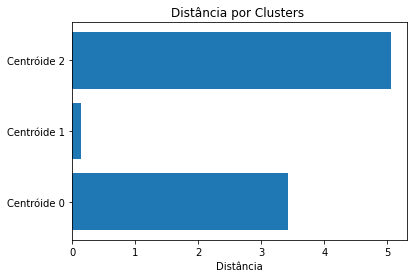

In [51]:
# Visualizando graficamente o valor da distância do primeiro registro com relação aos respectivos centróides. 
# Plotando gráfico da biblioteca matplotlib
%matplotlib inline
# Criando uma variável x e atribuindo a ela os valores 'Cluster 0', 'Cluster 1' e 'Cluster 2'. 
x = ['Centróide 0','Centróide 1','Centróide 2']
# Plotando gráfico do tipo de barras: barh(valoresdeX, valoresdeY)
plt.barh(x,distance_centroid[0])
# Nomeando o valor do plano cartesiano x.
plt.xlabel('Distância')
# Nomeando o valor do plano cartesiano y.
plt.title('Distância por Clusters ')
# Plotando o gráfico
plt.show()

#### Visualizando os clusters (de acordo com o centróide) de cada registro.

In [52]:
# Atributo 'labels_' exibe os clusters de cada registro.

In [53]:
labels_iris = kmeans_iris.labels_
labels_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Visualizando os Centróids vs Comprimento vs Largura da Sépala 

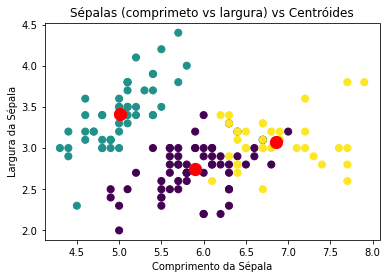

In [54]:
# Gráfico da biblioteca matplotlib
%matplotlib inline

# Escolhendo gráfico do tipo Scatter (Dispersão), passando valores dos planos cartesianos: x = x_iris['SepalLength'],
# y = x_iris['SepalWidth'], s = 'tamanho_pontos' c = 'kmeans_iris.labels_'. O parâmetro c define a coloração de acordo com 
# o centróide que o registro foi classificado.
plt.scatter(x_iris['SepalLength'], x_iris['SepalWidth'], s = 50, c = kmeans_iris.labels_)

# Configurando os centroides. Passando valores dos planos cartesianos: 
# x = todos os valores dos primeiros elementos da lista 
# y = todos os valores dos segundos elementos da lista
# s = tamanho do ponto e c = cor do ponto
# label = nomes dos pontos.
plt.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], s = 150, c = 'red',label = 'Centroids')

# Fornecendo os nomes para o título e os planos cartesianos x e y.
plt.title('Sépalas (comprimeto vs largura) vs Centróides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')

# Plotando o gráfico
plt.show()

### Fazendo Predições

In [55]:
# Criando um novo dataframe com novos valores das flores íris.

In [56]:
df_iris_nova = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]

In [57]:
# Fazendo predições do novo DataFrame com o método var_kmeans.predict(novo_df)
# O resultado é um array numpy com as predições de classes.

In [58]:
kmeans_iris.predict(df_iris_nova)

array([1, 2, 0])

In [59]:
type(kmeans_iris.predict(df_iris_nova))

numpy.ndarray

#### Visualizando as diferenças da Classificação Original vs Classificação da Predição

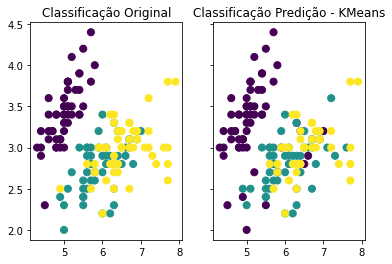

In [60]:
# Gráfico do tipo matplotlib
%matplotlib inline

# Criando uma figura com dois subplots
# Método nome_figura, (nome_plot1, nome_plot2) = plt.subplots(quantidade de linhas, quantidade de colunas que os subplotes
# estarão distribuídos)
fig_iris,(ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Definindo título para o subplot 1;
# Configurando os valores de x, y, s(tamanho), c = classificação por cor dos valores reais armazenados na Série y_iris.
ax1.set_title('Classificação Original')
ax1.scatter(x_iris['SepalLength'], x_iris['SepalWidth'],s=50,c=sorted(y_iris))

# Definindo título para o subplot 2;
# Configurando os valores de x, y, s(tamanho), c = classificação por cor dos valores preditos armazenados em 
# kmeans_iris.labels_
ax2.set_title('Classificação Predição - KMeans')
ax2.scatter(x_iris['SepalLength'], x_iris['SepalWidth'], s=50, c=sorted(kmeans_iris.labels_))